In [1]:
import numpy as np
%matplotlib inline

In [2]:
import matplotlib as mpl
from matplotlib import pyplot as plt
from cycler import cycler
color_cycle = cycler('color',['#377eb8','#4daf4a','#e41a1c','#984ea3','#ff7f00','#a65628','#f781bf','#999999','#ffff33'])
mpl.rc('figure',figsize=[2.7,1.6]) # figure size in inch
mpl.rc('figure',dpi=200) # inline dpi (=display size in browser)
mpl.rc('font',size=8.0)
#mpl.rcParams['font.sans-serif'] = 'Helvetica'
mpl.rc('lines',linewidth=0.7) 
mpl.rc('axes',prop_cycle=color_cycle,grid=True,linewidth=0.5,axisbelow=True,unicode_minus=False)
mpl.rc('grid',linewidth=0.3,linestyle=':')
mpl.rc('legend',fontsize='medium',framealpha=1.0,numpoints=1)
mpl.rc('svg',fonttype='none')
mpl.rc('savefig',dpi=300)

In [3]:
cp = 1005.4 
cv = 1005.4/1.4
rho = 1.205
K = 1.41767e5
nu = 1.506e-5
k = 1005.4*1.205*1.506e-5/0.708

f = 10e+3
omega = 2*np.pi*f

deltaV = np.sqrt(2*nu/omega)
deltaT = np.sqrt(2*k/(omega*rho*cp))
c = np.sqrt(K/rho)
lam = c/f

deltaV,deltaT,lam

(2.1894626934314014e-05, 2.6020816541619897e-05, 0.03429999455620972)

In [4]:
from sys import path
path.append('/home/flo/cfs/CFS/share/python')
from hdf5_tools import get_result, get_coordinates

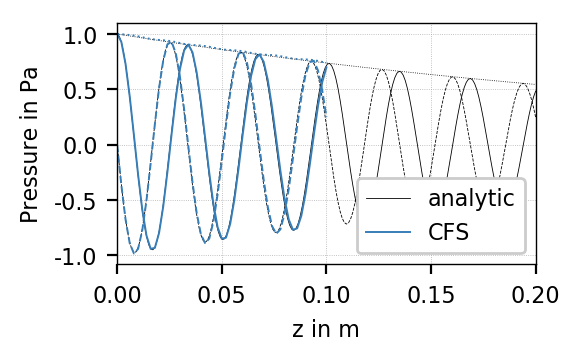

In [5]:
# analytic wave number
k0 = (omega/c)#**2
R = 0.001 # radius
L = 0.2 # length
S = R**2*np.pi # area of the boundary
U = 2*R*np.pi # circumference of the boundary

k = k0*np.sqrt((2*S-deltaT*(1j-1)*(cp/cv-1)*U)/(2*S+deltaV*(1j-1)*U))

z = np.linspace(0,L,200) #X[I,2]
p = np.exp(-1j*k*z)
fig,ax = plt.subplots()
l, = ax.plot(z,p.real,'k',label='analytic',lw=0.3,zorder=2)
ax.plot(z,p.imag,'--',color=l.get_color(),lw=l.get_lw(),zorder=2)
ax.plot(z,np.abs(p),':',color=l.get_color(),lw=l.get_lw(),zorder=2)

h5 = 'QuaterPipeBoundaryLayer3d.h5ref'

X = get_coordinates(h5,'V_pipe')
P = get_result(h5,'acouPressure','V_pipe')

I = np.argwhere(np.logical_and(np.abs(X[:,0])<1e-12,np.abs(X[:,1])<1e-12)).ravel()
Is = np.argsort(X[I,2])
I = I[Is]

l, = ax.plot(X[I,2],P[I].real,label='CFS',lw=0.7,marker=None,ms=3)
ax.plot(X[I,2],P[I].imag,'--',color=l.get_color(),lw=l.get_lw(),marker=l.get_marker(),ms=l.get_ms())
ax.plot(X[I,2],np.abs(P[I]),':',color=l.get_color(),lw=l.get_lw(),marker=l.get_marker(),ms=l.get_ms())

ax.set_xlim(0,L)
ax.set_xlabel('z in m')
ax.set_ylabel('Pressure in Pa')
ax.legend()

(False, True)

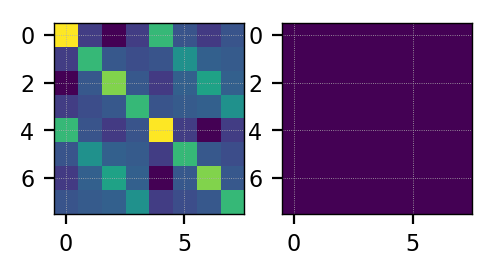

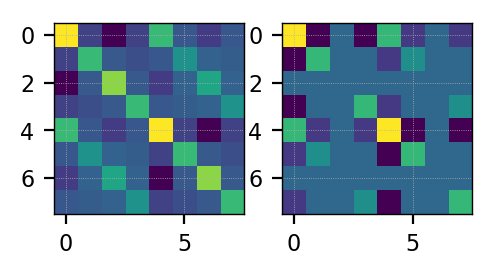

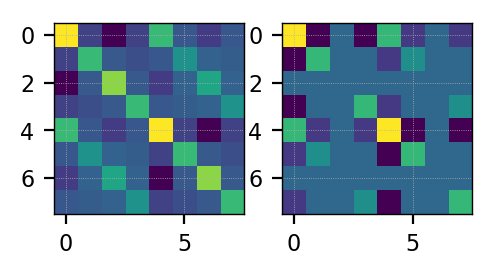

In [29]:
from scipy.io import mmread
A0rel = mmread('rel0_step_1_sys_0_0.mtx').toarray()
Arel = mmread('rel_step_1_sys_0_0.mtx').toarray()
Adbg = mmread('dbg_step_1_sys_0_0.mtx').toarray()
#,np.allclose(Arel.real,Adbg.real),np.allclose(Arel.imag,Adbg.imag)

fig,axs=plt.subplots(ncols=2)
axs[0].imshow( (A0rel).real )
axs[1].imshow( (A0rel).imag )

fig,axs=plt.subplots(ncols=2)
axs[0].imshow( (Arel).real )
axs[1].imshow( (Arel).imag )

fig,axs=plt.subplots(ncols=2)
axs[0].imshow( (Adbg).real )
axs[1].imshow( (Adbg).imag )

np.allclose(A0rel,Arel), np.allclose(Arel,Adbg)